# Initial Exploratory Data Analysis

This notebook aims to perform initial data analysis on the provided train set of predictive maintenance case.

In [1]:
# imports
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings (to keep notebook clean)
warnings.filterwarnings('ignore')

# definition of constants
DATASOURCE = '../../data/1_raw'
DATANAME = 'PM_train.txt'
DATASINK = '../../data/2_processed/'

# list of real columns names (provided by project description) 
real_cols = [
    'asset_id',
    'runtime',
    'set1',
    'set2',
    'set3',
]

for i in range(1, 22):
    real_cols.append(f'tag{i}')

In [2]:
# load the train set (previous look at data showed that it is a txt file with no headers, and the separator is blank space)
data = pd.read_csv(os.path.join(DATASOURCE,DATANAME), header=None, sep=' ')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [3]:
# there are two additional columns (26 and 27) with NaNs values
# remove those
data.drop([26,27], axis=1, inplace=True)

# change the columns names
data.columns = real_cols
data.head()

,asset_id,runtime,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,...,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# check general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   asset_id  20631 non-null  int64  
 1   runtime   20631 non-null  int64  
 2   set1      20631 non-null  float64
 3   set2      20631 non-null  float64
 4   set3      20631 non-null  float64
 5   tag1      20631 non-null  float64
 6   tag2      20631 non-null  float64
 7   tag3      20631 non-null  float64
 8   tag4      20631 non-null  float64
 9   tag5      20631 non-null  float64
 10  tag6      20631 non-null  float64
 11  tag7      20631 non-null  float64
 12  tag8      20631 non-null  float64
 13  tag9      20631 non-null  float64
 14  tag10     20631 non-null  float64
 15  tag11     20631 non-null  float64
 16  tag12     20631 non-null  float64
 17  tag13     20631 non-null  float64
 18  tag14     20631 non-null  float64
 19  tag15     20631 non-null  float64
 20  tag16     20631 non-null  fl

Apparently the data was previouly cleaned and formatted. There are no apparent errors of measurement nor missing values.
Let's confirm the missing values.

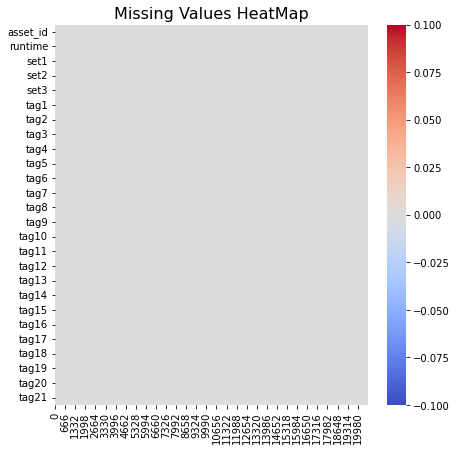

In [5]:
plt.figure(figsize=(7,7))
sns.heatmap(data.isna().T, vmin=0, cmap='coolwarm')
plt.title('Missing Values HeatMap', size=16)
plt.show()

The previous plot confirms that the data shows no missing values.

## Exploratory Questions

**1. Did all assets had the same useful life?**

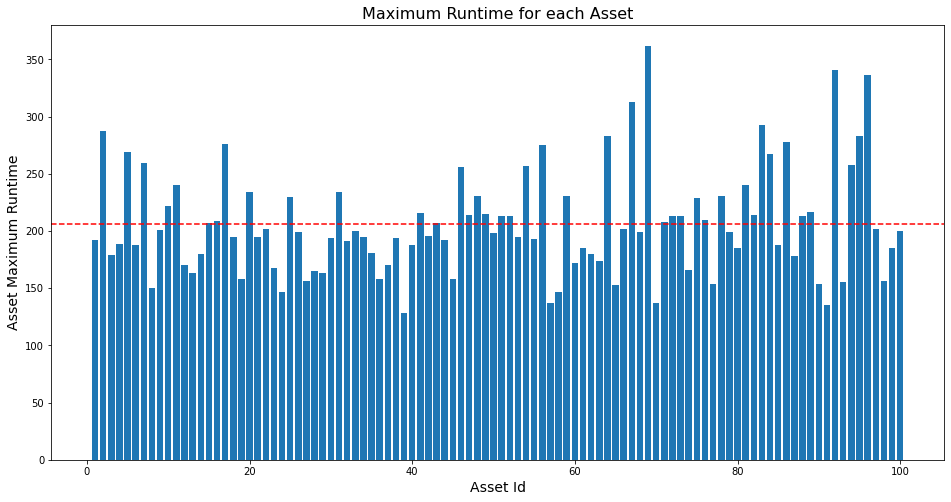

In [6]:
# check the maximum runtime for each asset_id
time_per_asset = pd.DataFrame(data.groupby(['asset_id'])['runtime'].max().values,
                              columns=['max_runtime'],
                              index=data.groupby(['asset_id'])['runtime'].max().index)

plt.figure(figsize=(16,8))
plt.bar(x=time_per_asset.index, height=time_per_asset.max_runtime.values)
plt.axhline(y=np.mean(time_per_asset.values), ls='--', color='red')
plt.xlabel('Asset Id', size=14)
plt.ylabel('Asset Maximum Runtime', size=14)
plt.title('Maximum Runtime for each Asset', size=16)
plt.show()

The plot above shows that the maximum runtime is not same for all the asset. It also shows that the majority of assets last less than the average line (red dashed line). This suggests a asymmetric distribution to the right, where the the assets that last longer tend to overestimate the average. Let's confirm this hypothesis.

In [7]:
# checking descriptive statistics
time_per_asset.describe()

,max_runtime
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


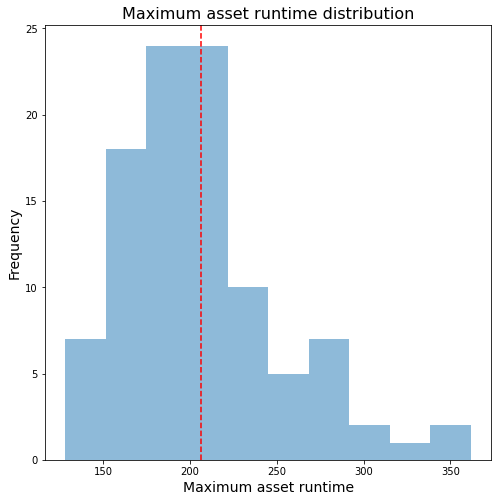

In [8]:
# plot histogram of maximum asset runtime
plt.figure(figsize=(8,8))
plt.hist(time_per_asset.max_runtime.values, alpha=0.5)
plt.axvline(x=time_per_asset.max_runtime.mean(), color='red', ls='--')
plt.xlabel('Maximum asset runtime', size=14)
plt.ylabel('Frequency', size=14)
plt.title('Maximum asset runtime distribution', size=16)
plt.show()

Both the descriptive statistics and the histogram confirm that there are some assets that last significantly longer than the average, which causes the asymmetry on the distribution.

**2. Are there outliers regarding the maximum runtime?**

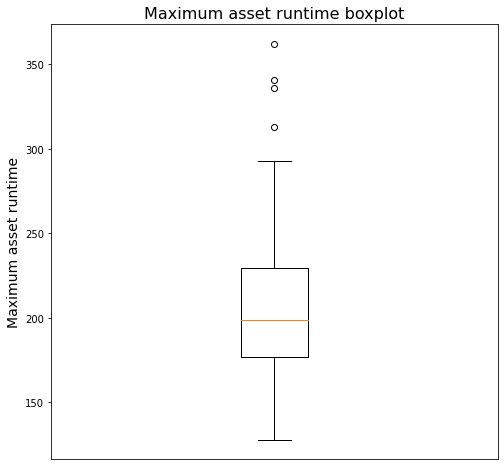

In [9]:
plt.figure(figsize=(8,8))
plt.boxplot(time_per_asset.max_runtime.values)
plt.ylabel('Maximum asset runtime', size=14)
plt.xticks(ticks=[0], labels=[''])
plt.title('Maximum asset runtime boxplot', size=16)
plt.show()

Yes, there are 4 outliers regarding the maximum runtime. All of them had a runtinme longer than 300 cycles. Yet, there is the problem of the asymmetric distribution.

To deal with this asymmetric, we'll use replace the values by using a symmetric 99 % quantiles strategy - the quantiles are used because they are more robust to extreme values than z-scores. Since the the main objective is to predict the remaining useful life and classify if it will fail after 20 cycles, it is assumed in this that the cost of replacing an equipment with some remaining useful life is lower than having an unexpected stop due to failure. Hence, the impact of underestimating a few asset's RUL is acceptable. The replace strategy is the following:

- since we do not lower outliers, calculate the 0.5 % quantile value
- calculate the distance of it from the median, to find the lower range which include 49.5 % of the data
- sum this range to the median, to find the limit that compreends the other 49.5 % of the data
- eliminate all the rows of assets ids with runtime higher than the limit

In [10]:
# calculate 0.5 % quantile
low_limit = time_per_asset.max_runtime.quantile(q=0.005)

# calculate the range
low_range = time_per_asset.max_runtime.median() - low_limit

# calculate the estimated superior limit (integer type)
high_lim = int(time_per_asset.max_runtime.median() + low_range)

In [11]:
# calculate the underestimation
time_per_asset['under_est'] = time_per_asset.max_runtime - high_lim

# check the impact of transformation
time_per_asset.loc[time_per_asset.under_est > 0, :]

,max_runtime,under_est
asset_id,,
2,287,21
5,269,3
17,276,10
56,275,9
64,283,17
67,313,47
69,362,96
83,293,27
84,267,1


In [12]:
# checking the sum
time_per_asset.loc[time_per_asset.under_est > 0, 'under_est'].sum()

405

The analysis showed that the maximum underestimation made after training the model on the transformed dataset will be aproximately 100 cycles for 1 asset. As already mentioned, this study assumes that this impact was discussed with business team and it was considered acceptable comparing to having unexpected stops. In addition, the summation of cycles rows that will be removed using this strategy is 405, which represents only 2 % of available data.

**[IMPORTANT]** This action was made because the business objective is to **predict the RUL and the probability of failing after 20 cycles**, not explaining why some RULs cycles are are longer than another.

In [13]:
# making the transformations on the data
data = data.loc[data.runtime <= high_lim,:]

Let's check if the transformations were effective

In [14]:
# check the maximum runtime for each asset_id
time_per_asset = pd.DataFrame(data.groupby(['asset_id'])['runtime'].max().values,
                              columns=['max_runtime'],
                              index=data.groupby(['asset_id'])['runtime'].max().index)

# checking descriptive statistics
time_per_asset.describe()

,max_runtime
count,100.000000
mean,202.260000
std,37.415931
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,266.000000


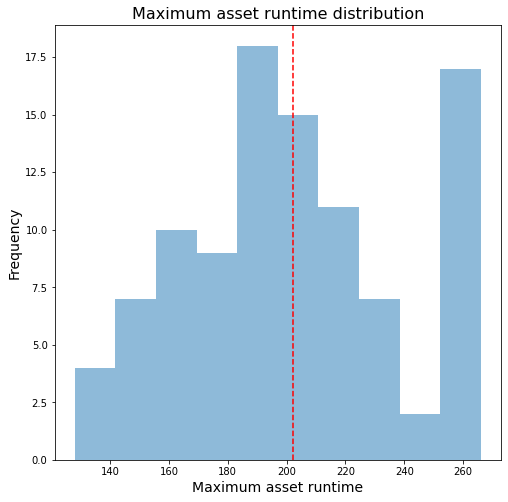

In [15]:
# plot histogram of maximum asset runtime
plt.figure(figsize=(8,8))
plt.hist(time_per_asset.max_runtime.values, alpha=0.5)
plt.axvline(x=time_per_asset.max_runtime.mean(), color='red', ls='--')
plt.xlabel('Maximum asset runtime', size=14)
plt.ylabel('Frequency', size=14)
plt.title('Maximum asset runtime distribution', size=16)
plt.show()

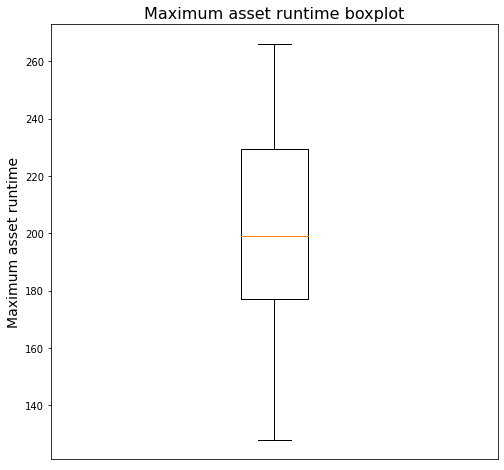

In [16]:
plt.figure(figsize=(8,8))
plt.boxplot(time_per_asset.max_runtime.values)
plt.ylabel('Maximum asset runtime', size=14)
plt.xticks(ticks=[0], labels=[''])
plt.title('Maximum asset runtime boxplot', size=16)
plt.show()

The descriptive statistics showed that after the transformation, the average value and the median value are closer than in the previous situation. The boxplot shows that there no more outliers.

However, the histogram shows that the modification produced a second mode group, which consists in the assets that have the longest useful lifes. This insight will be useful to differentiate the groups when modeling the RUL.

## Feature Engineering

Before proceeding to the next exploratory analysis steps, one must engineer features to train the desired models.

- For the RLU's model, the remaining life for each data point will be calculated on base the maximum runtime for each asset
- For the classification model, the row will receive the label 1 if there is a new asset id - which represents an asset replacement due to failure - in the next 200 cycles or 0 if isn't. 

**[IMPORTANT]** The challenge asked to do the classification for the next 20 cycles. However, the initial exploratory data analysis showed that no asset fails in less than 128 cycles, which turns impossible to train a supervised model for 20 cycles - there are no failure in such interval. Hence, the classification will be made for the next 200 cycles, because 200 is the most close of a typo to 20. Also, 200 cycles is very close to overall mean and thus, is makes more sense to business to predict if an asset will last longer than average.

### RLU Dataset

In [17]:
# make a copy train set for rlu problem
rlu_data = data.copy()

In [18]:
# iterate through each asset id and calculate the RLU
rlu_data['rlu'] = 0
for id in time_per_asset.index:
    
    # extract maximum runtime
    max_runtime = time_per_asset.loc[id, 'max_runtime']

    # calculate rlu
    rlu_data.loc[rlu_data.asset_id==id,'rlu'] = max_runtime - rlu_data.loc[rlu_data.asset_id==id, 'runtime']

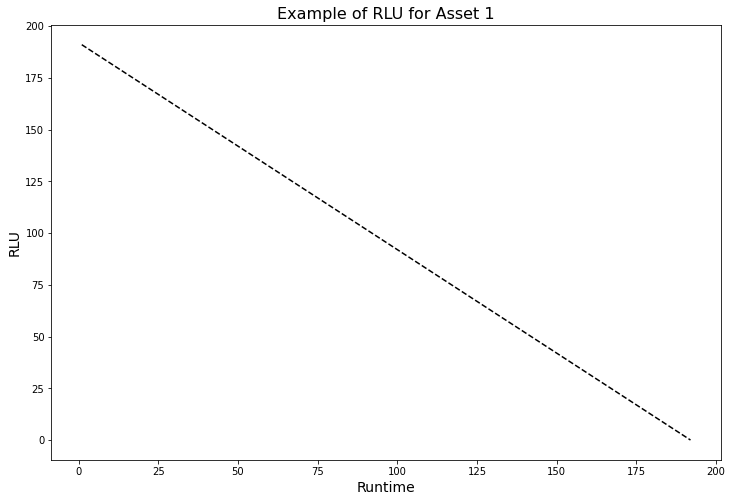

In [19]:
# check the succes
plt.figure(figsize=(12,8))
plt.plot(rlu_data.loc[rlu_data.asset_id==1].runtime, rlu_data.loc[rlu_data.asset_id==1, 'rlu'], 'k--')
plt.xlabel('Runtime', size=14)
plt.ylabel('RLU', size=14)
plt.title('Example of RLU for Asset 1', size=16)
plt.show()

In [20]:
# finally remove the asset id and the runtime columns to avoid data snooping
rlu_data.drop(['asset_id', 'runtime'], axis=1, inplace=True)
rlu_data.head()

,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,tag6,tag7,...,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,rlu
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [21]:
# save the rlu dataset
rlu_data.to_csv(os.path.join(DATASINK, 'rlu_data.csv'), index=False)

### Classification Dataset

In [22]:
# make copy of data
class_data = data.copy()

In [23]:
# define function to create classes
def create_failure_class(id: int,
                         time_per_asset: pd.DataFrame) -> int:
    """
    create a failure class
    1 - the asset will fail after more than 200 cycles
    0 - the asset will fail before than 200 cycles

    Parameters
    ----------
    id : int
        asset id
    time_per_asset : pd.DataFrame
        dataframe with the maximum
        runtime for each asset

    Returns
    -------
    int
        failure class
    """

    # extract the maximum runtime for the id
    max_runtime = time_per_asset.loc[id, 'max_runtime']

    # return adequate class
    if max_runtime > 200:
        return 1
    else:
        return 0

In [24]:
# build failure classes applying the function
class_data['failure'] = class_data.asset_id.apply(create_failure_class, time_per_asset=time_per_asset)
class_data.head()

,asset_id,runtime,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,...,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,failure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0


In [25]:
# as done for rlu, remove asset id and runtime columns
class_data.drop(['asset_id', 'runtime'], axis=1, inplace=True)
class_data.head()

,set1,set2,set3,tag1,tag2,tag3,tag4,tag5,tag6,tag7,...,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20,tag21,failure
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0


In [26]:
# save the rlu dataset
class_data.to_csv(os.path.join(DATASINK, 'class_data.csv'), index=False)